# tensorflow实现分类流程

### 生成样本集

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
def generate(sample_size,mean,cov,diff,regression):
    num_classes=2
    
    sample_per_class=int(sample_size/2)
    
    X0=np.random.multivariate_normal(mean,cov,sample_per_class)
    Y0=np.zeros(sample_per_class)
    #print("X0:",X0)
    #print("Y0:",Y0)
    for ci,d in enumerate(diff):
        #print("-------------------ci,d---------------------:")
        #print("ci:",ci)
        #print("d:",d)
        
        #print("--------------------X1:y1------------------------:")
        X1=np.random.multivariate_normal(mean+d,cov,sample_per_class)
        Y1=(ci+1)*np.ones(sample_per_class)
        #print("X1:",X1)
        #print("Y1:",Y1)
        X0=np.concatenate((X0,X1))
        Y0=np.concatenate((Y0,Y1))
        #print("---------------------X0，Y0-------------------------:")

        #print("X0:",X0)
        #print("Y0:",Y0)
        #print("--------------------X，Y--------------------------:")
        
    if regression==False:
        class_id=[Y1==class_number for class_number in range(num_classes)]
        Y=np.asarray(np.hstack(class_id),dtype=np.float32)
        X,Y=shuffle(X0,Y)
    else:
        
        X,Y=shuffle(X0,Y0)
    #print("X:",X)
    #print("Y:",Y)
    #print("------------------------------------------------:")
    return X,Y

### 样本可视化

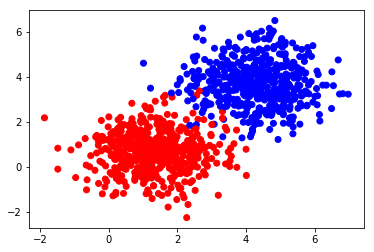

In [41]:
np.random.seed(10)
num_classes=2

mean=np.random.randn(num_classes)
cov=np.eye(num_classes)
X,Y=generate(1000,mean,cov,[3.0],True)

#print("mean:",mean)
#print("cov:",cov)
#print("X:",X)
#print("Y:",Y)

colors=['r' if l==0 else 'b' for l in Y[:]]

plt.scatter(X[:,0],X[:,1],c=colors)

plt.show()

### 使用tensorflow进行分类

epoch: 0
cost= 0.28224963 err= 5.835677430033684
epoch: 1
cost= 0.1841161 err= 2.9293049834668636
epoch: 2
cost= 0.13622522 err= 1.8027594378218055
epoch: 3
cost= 0.10920071 err= 1.321009835228324
epoch: 4
cost= 0.09234682 err= 1.0732473297975957
epoch: 5
cost= 0.081041396 err= 0.926894772797823
epoch: 6
cost= 0.07300299 err= 0.8318855110555887
epoch: 7
cost= 0.06699502 err= 0.7659151882398874
epoch: 8
cost= 0.062306933 err= 0.7177525935694575
epoch: 9
cost= 0.058514904 err= 0.6812087508151308
epoch: 10
cost= 0.055357553 err= 0.6526279035024345
epoch: 11
cost= 0.052668083 err= 0.6297260934952646
epoch: 12
cost= 0.050336055 err= 0.6110085289692506
epoch: 13
cost= 0.048285052 err= 0.5954574717907235
epoch: 14
cost= 0.046460498 err= 0.5823574732639827
epoch: 15
cost= 0.044822298 err= 0.571191034920048
epoch: 16
cost= 0.0433398 err= 0.5615753585589118
epoch: 17
cost= 0.04198938 err= 0.5532208279473707
epoch: 18
cost= 0.040752184 err= 0.5459049143246375
epoch: 19
cost= 0.039613225 err= 0.53

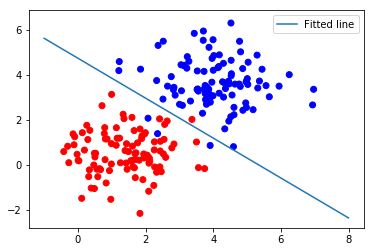

In [50]:
#定义维度
lab_dim=1
input_dim=2
#print(input_dim)

#定义占位符数据
input_features=tf.placeholder(tf.float32,[None,input_dim])
input_labels=tf.placeholder(tf.float32,[None,lab_dim])


#定义变量
W=tf.Variable(tf.random_normal([input_dim,lab_dim]),name="weight")
b=tf.Variable(tf.zeros([lab_dim],name="bias"))


#输出数据
output=tf.nn.sigmoid(tf.matmul(input_features,W)+b)

#交叉熵
coross_entropy=-(input_labels*tf.log(output)+(1-input_labels)*tf.log(1-output))

#误差
ser=tf.square(input_labels-output)

#损失函数
loss=tf.reduce_mean(coross_entropy)

#误差均值
err=tf.reduce_mean(ser)

#优化器
optimizer=tf.train.AdamOptimizer(0.04)

train=optimizer.minimize(loss)

maxEpochs=50
minibatchSize=25

with tf.Session() as sess:
    #初始化所有变量与占位符
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(maxEpochs):
        sumerr=0
        #对于每一个batch
        for i in range(np.int32(len(Y)/minibatchSize)):
            #取出X值
            x1=X[i*minibatchSize:(i+1)*minibatchSize,:]
            #取出Y值
            y1=np.reshape(Y[i*minibatchSize:(i+1)*minibatchSize],[-1,1])
            #改变y的数据结构，变成tensor数据
            tf.reshape(y1,[-1,1])
            
            #对相关结果进行计算
            _,lossval,outputval,errval=sess.run([train,loss,output,err],feed_dict={input_features:x1,input_labels:y1})
            
            #计算误差和
            sumerr=sumerr+errval
        
        print("epoch:",epoch)
        print("cost=",lossval,"err=",sumerr)
 

    #结果可视化
    train_X, train_Y = generate(100, mean, cov, [3.0],True)
    colors = ['r' if l == 0 else 'b' for l in train_Y[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    #plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y)
    #plt.colorbar()


#    x1w1+x2*w2+b=0
#    x2=-x1* w1/w2-b/w2
    x = np.linspace(-1,8,200) 
    y=-x*(sess.run(W)[0]/sess.run(W)[1])-sess.run(b)/sess.run(W)[1]
    plt.plot(x,y, label='Fitted line')
    plt.legend()
    plt.show() 